In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.inplace_ops import inplace_add

In [181]:
df = pd.read_csv('LFB_2019-22 (necessary data).csv')
df.head()

,DateOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,IncGeo_WardNameNew,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,01 Jan 2019,1,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,BR2,Bromley Town,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,333.0,2
1,01 Jan 2019,4,False Alarm,False alarm - Malicious,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Within same building,BR1,Bickley & Sundridge,...,318.0,Bromley,596.0,Beckenham,2.0,2.0,2.0,1.0,333.0,1
2,01 Jan 2019,8,False Alarm,AFA,NaN,Non Residential,Petrol station,Correct incident location,BR6,Farnborough & Crofton,...,322.0,Orpington,324.0,Orpington,1.0,2.0,2.0,1.0,333.0,1
3,01 Jan 2019,12,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,BR3,Beckenham Town & Copers Cope,...,318.0,Bromley,NaN,NaN,1.0,1.0,1.0,1.0,333.0,2
4,01 Jan 2019,15,Fire,Secondary Fire,NaN,Outdoor,Tree scrub,On land associated with building,BR1,Bickley & Sundridge,...,399.0,Sidcup,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1


# Problem Identification

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12496 entries, 0 to 12495
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DateOfCall                              12496 non-null  object 
 1   HourOfCall                              12496 non-null  int64  
 2   IncidentGroup                           12496 non-null  object 
 3   StopCodeDescription                     12496 non-null  object 
 4   SpecialServiceType                      4229 non-null   object 
 5   PropertyCategory                        12496 non-null  object 
 6   PropertyType                            12496 non-null  object 
 7   AddressQualifier                        12496 non-null  object 
 8   Postcode_district                       12496 non-null  object 
 9   IncGeo_WardNameNew                      12496 non-null  object 
 10  Easting_rounded                         12496 non-null  in

In [183]:
df.describe()

,HourOfCall,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
count,12496.00000,12496.000000,12496.000000,11933.000000,4226.000000,12338.000000,12338.000000,12403.000000,12400.000000,12400.000000,12496.000000
mean,13.65597,541277.200704,168109.875160,352.317104,439.973261,1.245745,1.434106,1.492381,1.406290,490.409113,1.342270
std,6.05838,4200.311013,2673.718688,149.457337,167.338913,0.529345,0.669688,1.530058,5.596978,1908.224389,1.569444
min,0.00000,533550.000000,156850.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,333.000000,1.000000
25%,10.00000,537650.000000,166850.000000,258.000000,335.000000,1.000000,1.000000,1.000000,1.000000,339.000000,1.000000
50%,14.00000,540950.000000,168750.000000,338.000000,419.000000,1.000000,1.000000,1.000000,1.000000,352.000000,1.000000
75%,18.00000,545075.000000,169850.000000,423.000000,516.000000,1.000000,2.000000,2.000000,1.000000,364.000000,1.000000
max,23.00000,550250.000000,173350.000000,1198.000000,1200.000000,7.000000,9.000000,128.000000,519.000000,172827.000000,97.000000


In [184]:
df.shape

(12496, 23)

In [185]:
df.isna().sum()

DateOfCall                                   0
HourOfCall                                   0
IncidentGroup                                0
StopCodeDescription                          0
SpecialServiceType                        8267
PropertyCategory                             0
PropertyType                                 0
AddressQualifier                             0
Postcode_district                            0
IncGeo_WardNameNew                           0
Easting_rounded                              0
Northing_rounded                             0
IncidentStationGround                        0
FirstPumpArriving_AttendanceTime           563
FirstPumpArriving_DeployedFromStation      563
SecondPumpArriving_AttendanceTime         8270
SecondPumpArriving_DeployedFromStation    8270
NumStationsWithPumpsAttending              158
NumPumpsAttending                          158
PumpCount                                   93
PumpHoursRoundUp                            96
Notional Cost

In [186]:
# Separate numerical and categorical data into different dataframes
num_df = df.select_dtypes(include=['int64', 'float64'])
cat_df = df.select_dtypes(include=['object'])
num_df

,HourOfCall,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,1,541150,168350,NaN,NaN,1.0,1.0,1.0,1.0,333.0,2
1,4,541650,168750,318.0,596.0,2.0,2.0,2.0,1.0,333.0,1
2,8,543250,165150,322.0,324.0,1.0,2.0,2.0,1.0,333.0,1
3,12,538050,169350,318.0,NaN,1.0,1.0,1.0,1.0,333.0,2
4,15,542250,169650,399.0,NaN,1.0,1.0,1.0,1.0,333.0,1
...,...,...,...,...,...,...,...,...,...,...,...
12491,22,535050,170050,433.0,NaN,1.0,1.0,1.0,1.0,364.0,1
12492,15,539450,165850,148.0,565.0,2.0,2.0,2.0,1.0,364.0,1
12493,17,542450,168350,756.0,758.0,1.0,2.0,2.0,2.0,728.0,1
12494,20,545750,165750,203.0,216.0,1.0,2.0,2.0,1.0,364.0,1


In [187]:
cat_df

,DateOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,IncGeo_WardNameNew,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation
0,01 Jan 2019,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,BR2,Bromley Town,Bromley,NaN,NaN
1,01 Jan 2019,False Alarm,False alarm - Malicious,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Within same building,BR1,Bickley & Sundridge,Bromley,Bromley,Beckenham
2,01 Jan 2019,False Alarm,AFA,NaN,Non Residential,Petrol station,Correct incident location,BR6,Farnborough & Crofton,Orpington,Orpington,Orpington
3,01 Jan 2019,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,BR3,Beckenham Town & Copers Cope,Beckenham,Bromley,NaN
4,01 Jan 2019,Fire,Secondary Fire,NaN,Outdoor,Tree scrub,On land associated with building,BR1,Bickley & Sundridge,Bromley,Sidcup,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12491,29 Nov 2022,Special Service,Special Service,Effecting entry/exit,Dwelling,House - single occupancy,Correct incident location,SE20,PENGE & CATOR,Beckenham,Beckenham,NaN
12492,30 Nov 2022,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,Within same building,BR4,HAYES & CONEY HALL,Addington,Addington,Beckenham
12493,30 Nov 2022,False Alarm,AFA,NaN,Other Residential,Nursing/Care Home/Hospice,Correct incident location,BR1,BICKLEY & SUNDRIDGE,Bromley,Sidcup,Sidcup
12494,30 Nov 2022,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,BR6,PETTS WOOD & KNOLL,Orpington,Orpington,Orpington


In [188]:
cat_df.isna().sum()

DateOfCall                                   0
IncidentGroup                                0
StopCodeDescription                          0
SpecialServiceType                        8267
PropertyCategory                             0
PropertyType                                 0
AddressQualifier                             0
Postcode_district                            0
IncGeo_WardNameNew                           0
IncidentStationGround                        0
FirstPumpArriving_DeployedFromStation      563
SecondPumpArriving_DeployedFromStation    8270
dtype: int64

In [189]:
# Replace null values with 'Unknown' in the 'categorical_column' column
cat_df['SpecialServiceType'].fillna('Unknown', inplace=True)
cat_df['FirstPumpArriving_DeployedFromStation'].fillna('Unknown', inplace=True)
cat_df['SecondPumpArriving_DeployedFromStation'].fillna('Unknown', inplace=True)
cat_df.isna().sum()

DateOfCall                                0
IncidentGroup                             0
StopCodeDescription                       0
SpecialServiceType                        0
PropertyCategory                          0
PropertyType                              0
AddressQualifier                          0
Postcode_district                         0
IncGeo_WardNameNew                        0
IncidentStationGround                     0
FirstPumpArriving_DeployedFromStation     0
SecondPumpArriving_DeployedFromStation    0
dtype: int64

In [190]:
cat_df.describe()

,DateOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,IncGeo_WardNameNew,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation
count,12496,12496,12496,12496,12496,12496,12496,12496,12496,12496,12496,12496
unique,1430,3,9,20,8,214,11,19,49,11,20,18
top,20 Oct 2021,False Alarm,Special Service,Unknown,Dwelling,House - single occupancy,Correct incident location,BR5,Bromley Town,Orpington,Bromley,Unknown
freq,61,5592,4168,8267,5563,2141,6481,2035,1044,3345,3352,8270


Observation: Above is the categorical data of our dataset and in the table the important values are shown. I will discuss the important categories and their values. Most of the incident are false alarms. Most of the special service type is unknown. Correct incident location is given 60% of the time. Most incident occurs at BR5 district. Most of the service is provided from Orpington station. Second pump station is barely used.

In [191]:
num_df.isna().sum()

HourOfCall                              0
Easting_rounded                         0
Northing_rounded                        0
FirstPumpArriving_AttendanceTime      563
SecondPumpArriving_AttendanceTime    8270
NumStationsWithPumpsAttending         158
NumPumpsAttending                     158
PumpCount                              93
PumpHoursRoundUp                       96
Notional Cost (£)                      96
NumCalls                                0
dtype: int64

In [192]:
# Replace null values with the mean in all numerical columns
numerical_columns = ['FirstPumpArriving_AttendanceTime','SecondPumpArriving_AttendanceTime','Notional Cost (£)','PumpHoursRoundUp']
num_df[numerical_columns] = num_df[numerical_columns].apply(lambda x: x.fillna(x.mean()))
num_df.isna().sum()

HourOfCall                             0
Easting_rounded                        0
Northing_rounded                       0
FirstPumpArriving_AttendanceTime       0
SecondPumpArriving_AttendanceTime      0
NumStationsWithPumpsAttending        158
NumPumpsAttending                    158
PumpCount                             93
PumpHoursRoundUp                       0
Notional Cost (£)                      0
NumCalls                               0
dtype: int64

In [193]:
# Replace null values with 0 in remaining columns
num_df.fillna(0, inplace=True)
num_df.isna().sum()

HourOfCall                           0
Easting_rounded                      0
Northing_rounded                     0
FirstPumpArriving_AttendanceTime     0
SecondPumpArriving_AttendanceTime    0
NumStationsWithPumpsAttending        0
NumPumpsAttending                    0
PumpCount                            0
PumpHoursRoundUp                     0
Notional Cost (£)                    0
NumCalls                             0
dtype: int64

In [194]:
skewness = num_df.skew()
skewness

HourOfCall                           -0.528099
Easting_rounded                      -0.016026
Northing_rounded                     -1.456311
FirstPumpArriving_AttendanceTime      1.129562
SecondPumpArriving_AttendanceTime     1.763371
NumStationsWithPumpsAttending         2.401124
NumPumpsAttending                     1.887031
PumpCount                            49.260071
PumpHoursRoundUp                     69.943507
Notional Cost (£)                    66.665397
NumCalls                             24.960269
dtype: float64

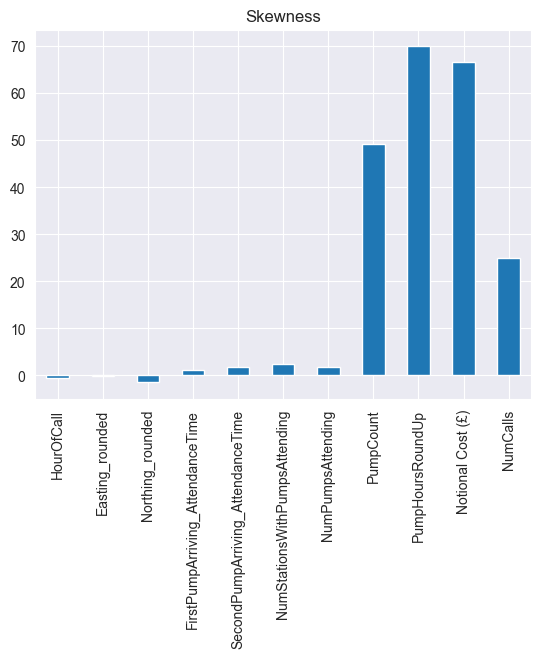

In [195]:
skewness.plot(kind='bar', title='Skewness')
plt.show()

Observation: Some columns are in the normal range. Some of the data is rightly skewed which means that the data is highly distorted and not symmetrical.

In [196]:
std = num_df.std()
std

HourOfCall                              6.058380
Easting_rounded                      4200.311013
Northing_rounded                     2673.718688
FirstPumpArriving_AttendanceTime      146.051403
SecondPumpArriving_AttendanceTime      97.306572
NumStationsWithPumpsAttending           0.544094
NumPumpsAttending                       0.684463
PumpCount                               1.529740
PumpHoursRoundUp                        5.575436
Notional Cost (£)                    1900.879741
NumCalls                                1.569444
dtype: float64

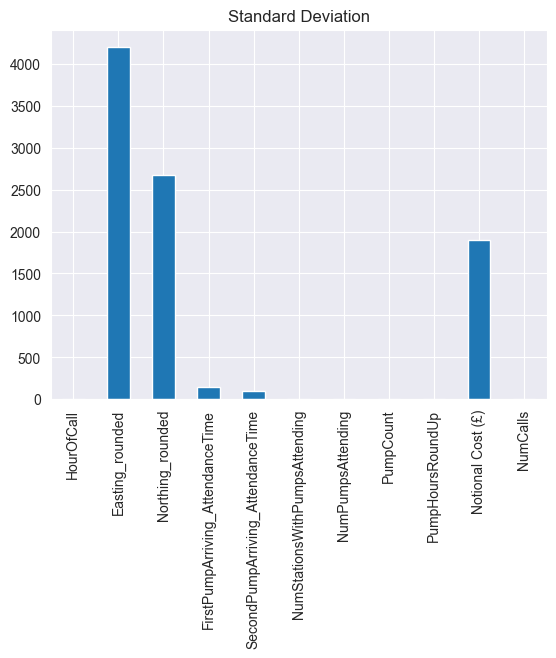

In [197]:
std.plot(kind='bar', title='Standard Deviation')
plt.show()

Observation: Most of the columns have very less value of std which means that the data is not varies from the mean value but there is one column which varies largely.

In [198]:
kurt = num_df.kurt()
kurt

HourOfCall                             -0.515266
Easting_rounded                        -1.123039
Northing_rounded                        2.666577
FirstPumpArriving_AttendanceTime        3.762814
SecondPumpArriving_AttendanceTime      12.347526
NumStationsWithPumpsAttending           9.488747
NumPumpsAttending                       6.731903
PumpCount                            3815.667198
PumpHoursRoundUp                     6086.808111
Notional Cost (£)                    5588.931644
NumCalls                             1212.874229
dtype: float64

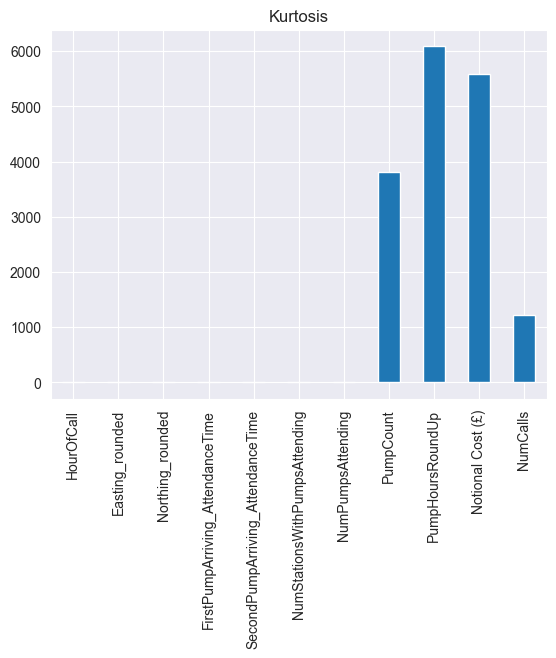

In [199]:
kurt.plot(kind='bar', title='Kurtosis')
plt.show()

Observation: apart from some columns the data distribution is closer to the mean.

In [200]:
incident_count = df['IncidentGroup'].value_counts()
incident_count

False Alarm        5592
Special Service    4229
Fire               2675
Name: IncidentGroup, dtype: int64

Observation: There is alot of false alarm calls.

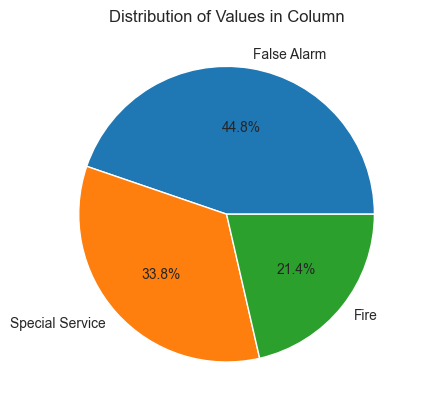

In [201]:
# Plot a pie chart of the counts
plt.pie(incident_count.values, labels=incident_count.index, autopct='%1.1f%%')
plt.title('Distribution of Values in Column')
plt.show()

Observation: We have a problem that most of the cases are false alarm weather it is intentional or not. There is a probability of 49% that the call to LFB would be a false alarm.

<AxesSubplot: xlabel='type'>

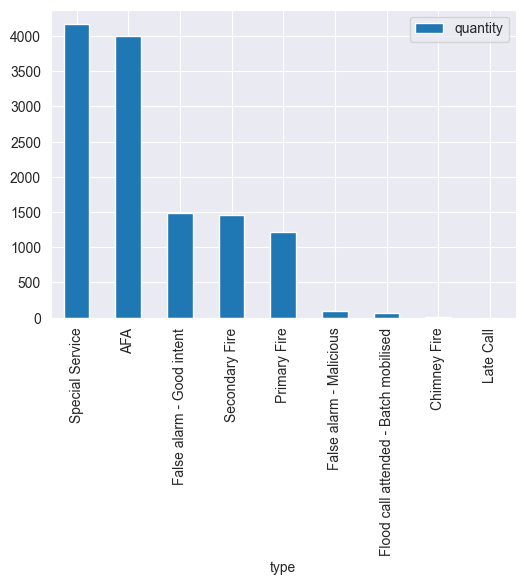

In [202]:
tmp = cat_df['StopCodeDescription'].value_counts()
t_df = pd.DataFrame({'type': tmp.index.to_list(), 'quantity': tmp.to_list()})
t_df.plot.bar(x='type', y='quantity', figsize=(6, 4))

Observation: We have two types of false alarm we have to deal with.

In [203]:
false_df = df[(df['StopCodeDescription'] == 'False alarm - Good intent')|(df['StopCodeDescription'] == 'False alarm - Malicious')]
false_df.shape

(1592, 23)

In [204]:
false_df1 = df[(df['StopCodeDescription'] == 'AFA')&(df['IncidentGroup'] == 'False Alarm')]
false_df1.shape

(4000, 23)

In [205]:
false_df = pd.concat([false_df,false_df1],axis=0)
false_df.head()

,DateOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,IncGeo_WardNameNew,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
1,01 Jan 2019,4,False Alarm,False alarm - Malicious,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Within same building,BR1,Bickley & Sundridge,...,318.0,Bromley,596.0,Beckenham,2.0,2.0,2.0,1.0,333.0,1
15,02 Jan 2019,17,False Alarm,False alarm - Malicious,NaN,Dwelling,House - single occupancy,Correct incident location,BR6,Farnborough & Crofton,...,377.0,Orpington,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1
16,02 Jan 2019,18,False Alarm,False alarm - Good intent,NaN,Dwelling,House - single occupancy,Correct incident location,BR5,St. Mary Cray,...,408.0,Orpington,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1
17,02 Jan 2019,20,False Alarm,False alarm - Good intent,NaN,Outdoor,Roadside vegetation,Open land/water - nearest gazetteer location,BR5,St. Paul's Cray,...,416.0,Orpington,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1
19,03 Jan 2019,2,False Alarm,False alarm - Good intent,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,BR1,Bickley & Sundridge,...,594.0,Bromley,753.0,Orpington,2.0,2.0,2.0,1.0,333.0,1


In [206]:
false_df['HourOfCall'].value_counts()

18    379
13    354
17    350
14    322
16    318
19    316
12    311
11    303
9     297
21    287
15    286
20    282
10    277
8     225
22    215
23    172
7     163
0     130
1     128
6     116
3     110
5      90
2      88
4      73
Name: HourOfCall, dtype: int64

Observation: Most of the false alarm calls are done in the 18th hour and in the pm time.

In [207]:
false_df['PropertyType'].value_counts()

House - single occupancy                              954
Self contained Sheltered Housing                      599
Purpose Built Flats/Maisonettes - Up to 3 storeys     525
Retirement/Old Persons Home                           352
Infant/Primary school                                 279
                                                     ... 
Train on Tube network                                   1
Motor Home                                              1
Club/night club                                         1
Other entertainment venue                               1
Laundrette                                              1
Name: PropertyType, Length: 172, dtype: int64

Observation: Most of the false alarm property type contains Single house occupancy and self-contained sheltered home. But there are false alarm cases against every property type.

In [208]:
first_pump_basis_of_hour_call = df.groupby('FirstPumpArriving_DeployedFromStation')['HourOfCall'].value_counts()
print(first_pump_basis_of_hour_call)

FirstPumpArriving_DeployedFromStation  HourOfCall
Addington                              16            32
                                       17            32
                                       10            31
                                       18            29
                                       19            22
                                                     ..
Woodside                               2              8
                                       3              5
                                       4              5
                                       6              5
                                       5              2
Name: HourOfCall, Length: 291, dtype: int64


Observation: On the 16th and 17th hour call, Addington provided the most services and most of the incidents happen at pm time.

In [209]:
df['Notional Cost (£)'].mean()

490.40911290322583

Observation: This is the average cost of attending an incident for the LFB.

In [210]:
# Calculate the average cost of attending incidents by incident type
avg_cost_by_type = df.groupby('IncidentGroup')['Notional Cost (£)'].mean()
print('\nAverage cost of attending an incident by type:\n')
print(avg_cost_by_type)


Average cost of attending an incident by type:

IncidentGroup
False Alarm        370.289020
Fire               792.071188
Special Service    457.792639
Name: Notional Cost (£), dtype: float64


Observation: These are the average cost for different incident group.

In [211]:
# Calculate the average cost of attending incidents by location
avg_cost_by_location = df.groupby('Postcode_district')['Notional Cost (£)'].mean()
print('\nAverage cost of attending an incident by location:\n')
print(avg_cost_by_location)


Average cost of attending an incident by location:

Postcode_district
BR1      422.890312
BR2      481.290281
BR3      587.776602
BR4      457.890411
BR5      464.199104
BR6      562.052903
BR7      468.371695
BR8      805.058824
CR0     3998.000000
CR6      736.444444
DA14     554.609375
SE12     690.500000
SE19     421.723404
SE20     432.662689
SE25     346.000000
SE26     467.092308
SE9      465.558074
TN14     673.133333
TN16     489.315166
Name: Notional Cost (£), dtype: float64


Observation: These are the average cost for LFB for different locations.

In [212]:
true_df1 = cat_df[(cat_df['IncidentGroup'] == 'Fire')|(cat_df['IncidentGroup'] == 'Special Service')]
true_df1.shape

(6904, 12)

In [213]:
most_area_affected = true_df1.groupby('Postcode_district')['IncidentGroup'].value_counts()
most_area_affected = most_area_affected.sort_values(ascending=False)
print(most_area_affected)

Postcode_district  IncidentGroup  
BR5                Fire               735
BR3                Special Service    684
BR5                Special Service    624
BR1                Special Service    568
SE20               Special Service    544
BR6                Special Service    535
BR2                Special Service    471
BR6                Fire               338
BR2                Fire               325
BR3                Fire               281
BR1                Fire               245
SE20               Fire               207
BR7                Special Service    192
TN16               Special Service    164
BR4                Special Service    149
BR7                Fire               140
SE9                Fire               114
                   Special Service    110
BR4                Fire                94
TN16               Fire                89
SE19               Special Service     75
SE26               Special Service     63
                   Fire                32

Observation: BR5 district is the most affected area by fire and the list shows that there are more districts which have high number of incidents.

In [214]:
true_df1['PropertyType'].value_counts()

House - single occupancy                              1187
Car                                                    804
Purpose Built Flats/Maisonettes - Up to 3 storeys      760
Purpose Built Flats/Maisonettes - 4 to 9 storeys       382
Multiple Vehicles                                      273
                                                      ... 
Helicopter                                               1
Indoor stadium                                           1
Other aircraft                                           1
Local Government Office                                  1
Airport - hangar                                         1
Name: PropertyType, Length: 175, dtype: int64

Observation: Single occupancy house has the most chances of having a fire.

In [215]:
most_property_affected = df.groupby('HourOfCall')['PropertyType'].value_counts()
most_property_affected = most_property_affected.sort_values(ascending=False)
print(most_property_affected)

HourOfCall  PropertyType                        
17          House - single occupancy                141
19          House - single occupancy                135
18          House - single occupancy                133
13          House - single occupancy                127
21          House - single occupancy                114
                                                   ... 
9           Motor Home                                1
            Manufacturing assembly plant              1
            Lorry/HGV                                 1
            Light aircraft                            1
23          Woodland/forest - conifers/softwood       1
Name: PropertyType, Length: 1966, dtype: int64


Observation: These fires are caused most at afternoon time.

<AxesSubplot: xlabel='type'>

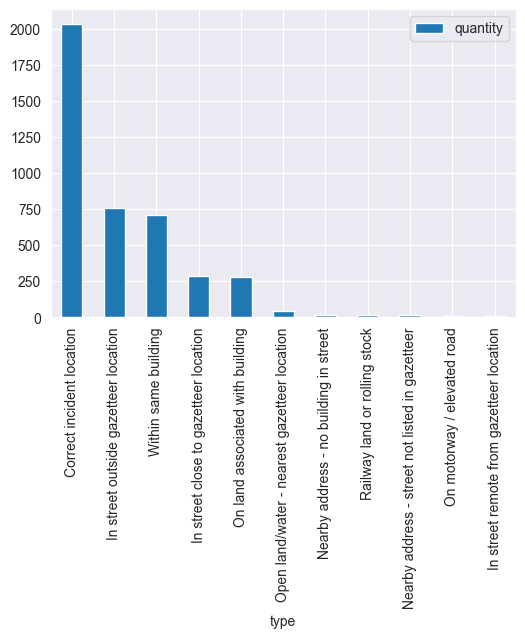

In [216]:
filtered_df = cat_df['AddressQualifier'][cat_df['StopCodeDescription'] == 'Special Service'].value_counts()
t_df = pd.DataFrame({'type': filtered_df.index.to_list(), 'quantity': filtered_df.to_list()})
t_df.plot.bar(x='type', y='quantity', figsize=(6, 4))

Observation: The good thing is for the special service the correct location is given most of the time.

In [217]:
temp2 = df[(df['IncidentGroup'] == 'False Alarm')]
amount = temp2['Notional Cost (£)'].sum()
print('Amount wasted on False Alarm: ',amount)

Amount wasted on False Alarm:  2063991.0


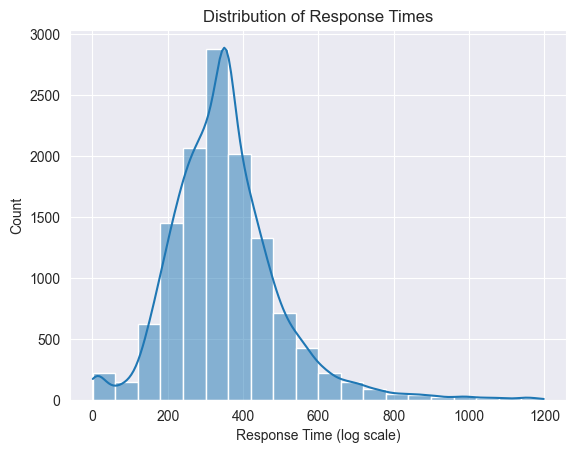

In [218]:
import seaborn as sns
# Plot a histogram of response times
sns.histplot(data=num_df, x='FirstPumpArriving_AttendanceTime', bins=20, kde=True)
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (log scale)')
plt.ylabel('Count')
plt.show()

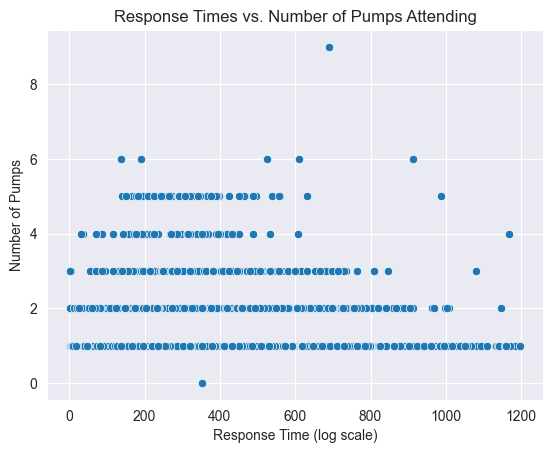

In [219]:
# Plot a scatterplot of response times and number of pumps attending
sns.scatterplot(data=num_df, x='FirstPumpArriving_AttendanceTime', y='NumPumpsAttending')
plt.title('Response Times vs. Number of Pumps Attending')
plt.xlabel('Response Time (log scale)')
plt.ylabel('Number of Pumps')
plt.show()

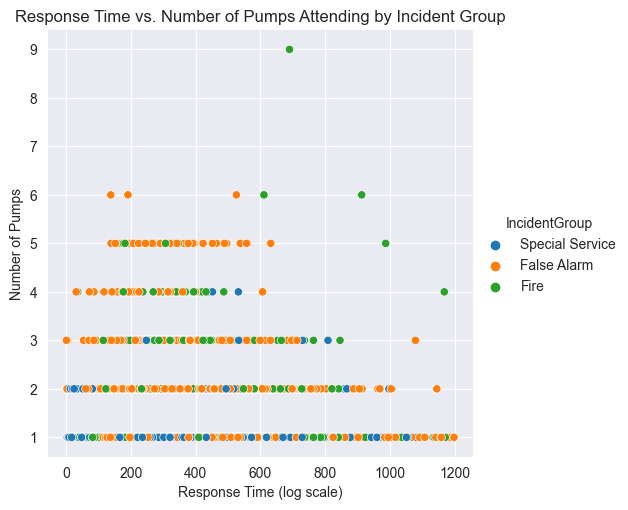

In [220]:
# Scatterplot of response time vs. number of pumps attending by incident group
sns.relplot(data=df, x='FirstPumpArriving_AttendanceTime', y='NumPumpsAttending', hue='IncidentGroup')
plt.title('Response Time vs. Number of Pumps Attending by Incident Group')
plt.xlabel('Response Time (log scale)')
plt.ylabel('Number of Pumps')
plt.show()

Observation: Response time is good from the fire station to the incident.

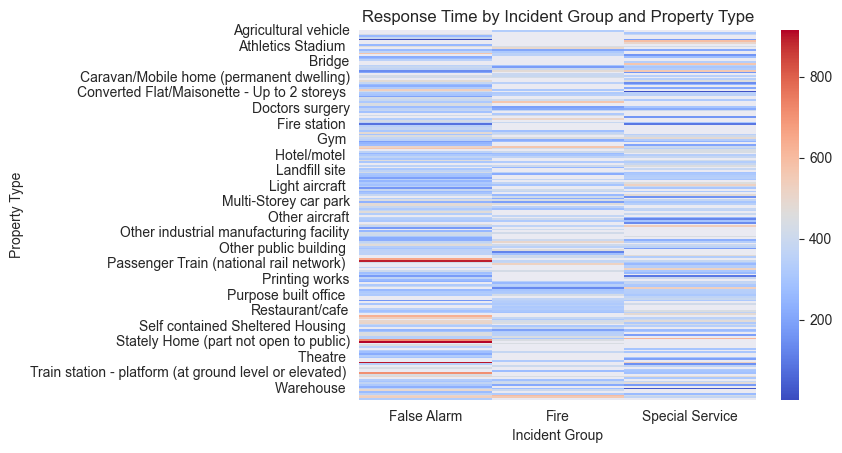

In [221]:
# Heatmap of response time by incident group and property type
pivot = df.pivot_table(values='FirstPumpArriving_AttendanceTime', index='PropertyType', columns='IncidentGroup',
                       aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm')
plt.title('Response Time by Incident Group and Property Type')
plt.xlabel('Incident Group')
plt.ylabel('Property Type')
plt.show()

# Data Preparation

In [222]:
df_final = pd.concat([cat_df,num_df],axis=1)
df_final.head()

,DateOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,IncGeo_WardNameNew,IncidentStationGround,...,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,01 Jan 2019,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,BR2,Bromley Town,Bromley,...,541150,168350,352.317104,439.973261,1.0,1.0,1.0,1.0,333.0,2
1,01 Jan 2019,False Alarm,False alarm - Malicious,Unknown,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Within same building,BR1,Bickley & Sundridge,Bromley,...,541650,168750,318.000000,596.000000,2.0,2.0,2.0,1.0,333.0,1
2,01 Jan 2019,False Alarm,AFA,Unknown,Non Residential,Petrol station,Correct incident location,BR6,Farnborough & Crofton,Orpington,...,543250,165150,322.000000,324.000000,1.0,2.0,2.0,1.0,333.0,1
3,01 Jan 2019,False Alarm,AFA,Unknown,Dwelling,Self contained Sheltered Housing,Correct incident location,BR3,Beckenham Town & Copers Cope,Beckenham,...,538050,169350,318.000000,439.973261,1.0,1.0,1.0,1.0,333.0,2
4,01 Jan 2019,Fire,Secondary Fire,Unknown,Outdoor,Tree scrub,On land associated with building,BR1,Bickley & Sundridge,Bromley,...,542250,169650,399.000000,439.973261,1.0,1.0,1.0,1.0,333.0,1


In [223]:
df_final.isna().sum()

DateOfCall                                0
IncidentGroup                             0
StopCodeDescription                       0
SpecialServiceType                        0
PropertyCategory                          0
PropertyType                              0
AddressQualifier                          0
Postcode_district                         0
IncGeo_WardNameNew                        0
IncidentStationGround                     0
FirstPumpArriving_DeployedFromStation     0
SecondPumpArriving_DeployedFromStation    0
HourOfCall                                0
Easting_rounded                           0
Northing_rounded                          0
FirstPumpArriving_AttendanceTime          0
SecondPumpArriving_AttendanceTime         0
NumStationsWithPumpsAttending             0
NumPumpsAttending                         0
PumpCount                                 0
PumpHoursRoundUp                          0
Notional Cost (£)                         0
NumCalls                        

In [224]:
duplicate = df_final.duplicated()
print(duplicate.value_counts())

False    12486
True        10
dtype: int64


Observation: 10 duplicate values.

In [225]:
# Remove the duplicate values
df_final = df_final.drop_duplicates()
duplicate = df_final.duplicated()
print(duplicate.value_counts())

False    12486
dtype: int64


Observation: No duplicate values.

In [226]:
# Convert DateOfCall column to datetime format
df_final['DateOfCall'] = pd.to_datetime(df_final['DateOfCall'])

# Create new columns for year, month, and day of week
df_final['Year'] = df_final['DateOfCall'].dt.year
df_final['Month'] = df_final['DateOfCall'].dt.month
df_final['DayOfWeek'] = df_final['DateOfCall'].dt.dayofweek

In [227]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12486 entries, 0 to 12495
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   DateOfCall                              12486 non-null  datetime64[ns]
 1   IncidentGroup                           12486 non-null  object        
 2   StopCodeDescription                     12486 non-null  object        
 3   SpecialServiceType                      12486 non-null  object        
 4   PropertyCategory                        12486 non-null  object        
 5   PropertyType                            12486 non-null  object        
 6   AddressQualifier                        12486 non-null  object        
 7   Postcode_district                       12486 non-null  object        
 8   IncGeo_WardNameNew                      12486 non-null  object        
 9   IncidentStationGround                   12486 non-

In [228]:
df_final.shape

(12486, 26)

In [229]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the categorical columns
categorical_cols = ['IncidentGroup', 'StopCodeDescription', 'PropertyCategory', 'PropertyType', 'IncidentStationGround', 'FirstPumpArriving_DeployedFromStation']

# Define the numerical columns
numerical_cols = ['FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'PumpHoursRoundUp', 'Notional Cost (£)', 'NumCalls']

# One-hot encode the categorical columns
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cols = pd.DataFrame(onehot_encoder.fit_transform(df_final[categorical_cols]))
encoded_cols.columns = onehot_encoder.get_feature_names_out(categorical_cols)

# Concatenate the encoded categorical columns with the numerical columns
transformed_data = pd.concat([df_final[numerical_cols], encoded_cols], axis=1)

# Standardize the numerical columns
scaler = StandardScaler()
transformed_data[numerical_cols] = scaler.fit_transform(transformed_data[numerical_cols])

In [231]:
transformed_data.head()

,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls,IncidentGroup_False Alarm,IncidentGroup_Fire,IncidentGroup_Special Service,...,FirstPumpArriving_DeployedFromStation_Lee Green,FirstPumpArriving_DeployedFromStation_Lewisham,FirstPumpArriving_DeployedFromStation_Norbury,FirstPumpArriving_DeployedFromStation_Orpington,FirstPumpArriving_DeployedFromStation_Plumstead,FirstPumpArriving_DeployedFromStation_Sidcup,FirstPumpArriving_DeployedFromStation_Unknown,FirstPumpArriving_DeployedFromStation_West Norwood,FirstPumpArriving_DeployedFromStation_Wimbledon,FirstPumpArriving_DeployedFromStation_Woodside
0,-3.890613e-16,-0.425238,-0.610221,-0.314951,-0.0728,-0.082731,0.418767,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-2.348813e-01,1.415789,0.852763,0.338611,-0.0728,-0.082731,-0.218184,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.075035e-01,-0.425238,0.852763,0.338611,-0.0728,-0.082731,-0.218184,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.348813e-01,-0.425238,-0.610221,-0.314951,-0.0728,-0.082731,0.418767,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.195182e-01,-0.425238,-0.610221,-0.314951,-0.0728,-0.082731,-0.218184,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [232]:
transformed_data.isna().sum()

FirstPumpArriving_AttendanceTime                      10
NumStationsWithPumpsAttending                         10
NumPumpsAttending                                     10
PumpCount                                             10
PumpHoursRoundUp                                      10
                                                      ..
FirstPumpArriving_DeployedFromStation_Sidcup          10
FirstPumpArriving_DeployedFromStation_Unknown         10
FirstPumpArriving_DeployedFromStation_West Norwood    10
FirstPumpArriving_DeployedFromStation_Wimbledon       10
FirstPumpArriving_DeployedFromStation_Woodside        10
Length: 272, dtype: int64

In [233]:
transformed_data.shape

(12496, 272)

In [236]:
transformed_data = transformed_data.dropna()
transformed_data.shape

(12476, 272)

In [238]:
# drop the last 10 rows
df_final = df_final.drop(df.iloc[-10:].index)
df_final.shape

(12476, 26)

Dropped last 10 rows of df_final so that the shape of df_final and transformed_data could be same.

# Model Construction

In [246]:
from sklearn.cluster import KMeans

# Instantiate the KMeans class with the desired number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the transformed data
kmeans.fit(transformed_data)

# Predict the cluster labels for each data point
cluster_labels = kmeans.predict(transformed_data)

# Add the predicted labels to the original data frame
df_final['Cluster'] = cluster_labels

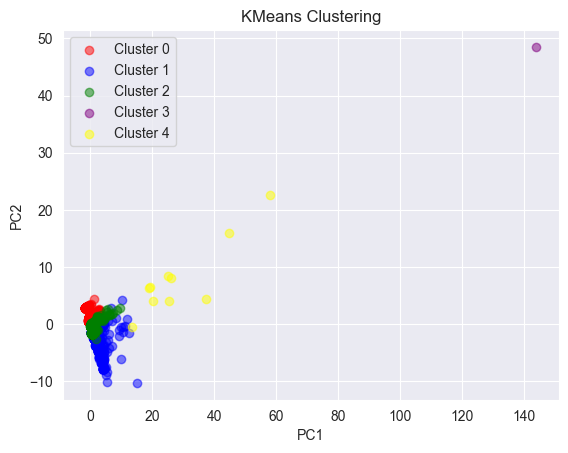

In [247]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(transformed_data)

# Create a scatter plot of the reduced data with colors representing the clusters
colors = ['red', 'blue', 'green', 'purple', 'yellow']
for i in range(kmeans.n_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0], reduced_data[kmeans.labels_ == i, 1], color=colors[i], alpha=0.5, label='Cluster {}'.format(i))

plt.title('KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Observation: This is the cluster made by k-means which shows only one or two outliers.

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor

# Define the dependent and independent variables
X = transformed_data.drop('FirstPumpArriving_AttendanceTime', axis=1)
y = transformed_data['FirstPumpArriving_AttendanceTime']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the random forest model
rf.fit(X_train, y_train)

# Predict the response time for the test set
y_pred = rf.predict(X_test)

# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_test, y_pred)

print("Mean absolute error: ", mae)

Mean absolute error:  0.7951068563415211


In [249]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Define the dependent and independent variables
X = transformed_data.drop('FirstPumpArriving_AttendanceTime', axis=1)
y = transformed_data['FirstPumpArriving_AttendanceTime']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Instantiate the support vector regressor
svr = SVR(kernel='linear')

# Train the support vector model
svr.fit(X_train, y_train)

# Predict the response time for the test set
y_pred = svr.predict(X_test)

# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_test, y_pred)

print("Mean absolute error: ", mae)

Mean absolute error:  0.7257754112024049


# Model Interpretation and Evaluation

4.1: Using k-means we plot a graph having 5 clusters. The graph shows that the data clustered was quite accurate and there is only one or two visible outlier. The clustering algorithm grouped incidents based on similarity, and a scatter plot showed that the clusters were well-separated. Correlation analysis identified patterns and relationships between features, which were visualized using a heatmap. Relevant plots, such as histograms and box plots, were created to better understand the data distribution and differences among categories. These models and plots provided valuable insights into the data and can aid in decision-making regarding emergency service provision and resource allocation.

4.2: We used Random Forest and SVM in predictive models. Since our data is continuous, both the models we used are regressor and we used mean absolute error to check our model. The MAE for RF is 0.795 while for SVM the value is 0.725. We conclude that SVM works better than the RF and also since the error we found was on test data we cannot say that the model is over-fitted. We cannot find accuracy or classification report because our data is continuous and regression models are used.

4.3: In the descriptive modeling there were many missing values, outliers, large values of skewness and std which shows asymmetric in the dataset. A lot of data preprocessing was done but after that k-means, RF, and SVM models worked fine. These issues in the dataset concern the business to conduct and gather data more carefully.

# Summary
After a long analysis of this dataset, we found out that most of the incidents are false alarms which is a concern. The average call time is greater when there is a false alarm. A lot of cost is wasted on false alarm. The good thing is that most of the false alarm incidents are with good intentions and not malicious. Most of the incidents happens in the BR5 district so the stations in that area need to be topnotch. The response time of the station to the incident is better than average but in some cases it is not good and needed to be look at. The fire cases incidents are consistent throughout the years and increased in the recent year. I know it's not because of this business but precautions should decrease the incidents throughout the years. The dataset was not well distributed and was asymmetrical. There were many null values. If there is a case when a particular service is not used or a value of a column is not used please fill it with special category, not null.